In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # numpy로 데이터 형식 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures # polynomial transform 곡선을 만들기 위해 항을 늘려주는 것

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [14]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [9]:
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594155


In [18]:
#
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [20]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999938143
-144.40744532797535


In [21]:
# Rigde regression

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

tran_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(tran_scaled, train_target)

Ridge()

In [25]:
print(ridge.score(tran_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615386


In [26]:
# Ridge lambda plot

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(tran_scaled, train_target)
    
    train_score.append(ridge.score(tran_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [27]:
print(train_score)
print(test_score)

[0.9930455252088589, 0.9917809981250533, 0.9903815817570368, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961572401, 0.9800187936873217, 0.9827976465386896, 0.9790693977615386, 0.9725329582461569, 0.9627042641050291]


<function matplotlib.pyplot.show(close=None, block=None)>

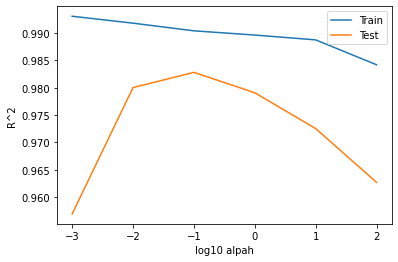

In [30]:
plt.plot(np.log10(alpha_list), train_score, label = "Train")
plt.plot(np.log10(alpha_list), test_score, label = 'Test')

plt.xlabel('log10 alpah')
plt.ylabel('R^2')
plt.legend()

plt.show

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(tran_scaled, train_target)

Lasso()

In [33]:
print(lasso.score(tran_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [40]:
train_lasso = []
test_lasso = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(tran_scaled, train_target)
    
    train_lasso.append(lasso.score(tran_scaled, train_target))
    test_lasso.append(lasso.score(test_scaled, test_target))

C:\Users\tamia\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\tamia\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\tamia\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


<function matplotlib.pyplot.show(close=None, block=None)>

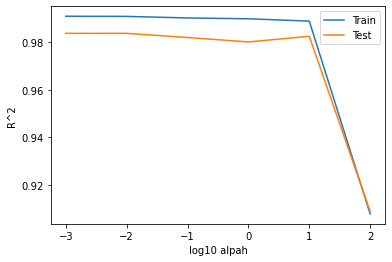

In [41]:
plt.plot(np.log10(alpha_list), train_lasso, label = "Train")
plt.plot(np.log10(alpha_list), test_lasso, label = 'Test')

plt.xlabel('log10 alpah')
plt.ylabel('R^2')
plt.legend()

plt.show

In [42]:
lasso = Lasso(alpha=10)
lasso.fit(tran_scaled, train_target)

print(lasso.score(tran_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [43]:
np.sum(lasso.coef_ !=0)

15